In [0]:
#import libraries
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2018) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
#import data, calculate standard score
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
features=np.concatenate((x_train,x_test),axis=0)
labels=np_utils.to_categorical(np.concatenate((y_train,y_test),axis=0).reshape(1,-1)[0],10)
features=features.astype('float')/255

In [0]:
#CNN model
def cal_accurancy(train_features,train_labels,test_features,test_labels):
    model = Sequential()

    model.add(Convolution2D(48, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Convolution2D(48, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(96, (3, 3)))
    model.add(Activation('relu'))
    model.add(Convolution2D(96, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    start = time.time()
    model_info = model.fit(train_features, train_labels, batch_size=128, epochs=20, validation_data = (test_features, test_labels), verbose=0)
    end = time.time()

    print("Model took %0.2f seconds to train"%(end - start))
    
    result = model.predict(test_features)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_labels, axis=1)

    n=0
    for i in range(6000):
        confusion[predicted_class[i]][true_class[i]]+=1
        if(predicted_class[i]==true_class[i]):
            n=n+1

    for i in range(10):
        for j in range(6000):
            if(predicted_class[j]==i and true_class[j]==i):
              TP[i]+=1
            if(predicted_class[j]==i and true_class[j]!=i):
              FP[i]+=1
            if(predicted_class[j]!=i and true_class[j]==i):
              FN[i]+=1
            if(predicted_class[j]!=i and true_class[j]!=i):
              TN[i]+=1
    return n/6000

In [12]:
#10-fold cross validation
TP=np.zeros(10)
FP=np.zeros(10)
TN=np.zeros(10)
FN=np.zeros(10)
Accuracy=np.zeros(10)
Precision=np.zeros(10)
Recall=np.zeros(10)
F1_Score=np.zeros(10)
confusion=np.zeros((10,10))
acc=[]
for i in range(10):
    train_features=np.concatenate((features[0:i*6000], features[(i+1)*6000:]), axis=0)    
    train_labels=np.concatenate((labels[0:i*6000], labels[(i+1)*6000:]), axis=0)   
    test_features=features[i*6000:(i+1)*6000]
    test_labels=labels[i*6000:(i+1)*6000]
    acc.append(cal_accurancy(train_features,train_labels,test_features,test_labels))
    
print(sum(acc)/10)
for i in range(10):
    Accuracy[i]=(TP[i]+TN[i])/(TP[i]+TN[i]+FN[i]+FP[i])
    Precision[i] = TP[i]/(TP[i]+FP[i])
    Recall[i] = TP[i]/(TP[i]+FN[i])
    F1_Score[i] = 2*(Recall[i] * Precision[i]) / (Recall[i] + Precision[i])

Model took 330.36 seconds to train
Model took 331.08 seconds to train
Model took 331.90 seconds to train
Model took 331.97 seconds to train
Model took 332.25 seconds to train
Model took 333.17 seconds to train
Model took 333.49 seconds to train
Model took 333.65 seconds to train
Model took 334.22 seconds to train
Model took 334.36 seconds to train
0.8084166666666667


In [16]:
confusion

array([[4.989e+03, 7.200e+01, 2.900e+02, 7.700e+01, 9.700e+01, 2.800e+01,
        2.900e+01, 4.900e+01, 2.280e+02, 1.240e+02],
       [6.700e+01, 5.426e+03, 1.700e+01, 1.900e+01, 7.000e+00, 1.100e+01,
        1.800e+01, 5.000e+00, 9.500e+01, 2.820e+02],
       [2.310e+02, 2.700e+01, 4.385e+03, 3.280e+02, 2.960e+02, 2.500e+02,
        1.940e+02, 1.710e+02, 6.400e+01, 2.900e+01],
       [7.200e+01, 2.500e+01, 2.540e+02, 3.888e+03, 2.820e+02, 9.300e+02,
        2.340e+02, 2.360e+02, 5.900e+01, 7.000e+01],
       [7.300e+01, 1.300e+01, 3.630e+02, 3.020e+02, 4.781e+03, 2.210e+02,
        1.410e+02, 3.070e+02, 2.000e+01, 2.100e+01],
       [2.200e+01, 1.800e+01, 2.090e+02, 7.690e+02, 1.250e+02, 4.205e+03,
        6.500e+01, 2.180e+02, 8.000e+00, 1.600e+01],
       [3.600e+01, 3.200e+01, 3.000e+02, 3.600e+02, 1.890e+02, 1.230e+02,
        5.264e+03, 3.100e+01, 3.200e+01, 2.500e+01],
       [4.800e+01, 1.100e+01, 9.600e+01, 1.460e+02, 1.900e+02, 2.040e+02,
        1.200e+01, 4.924e+03, 2.200e+

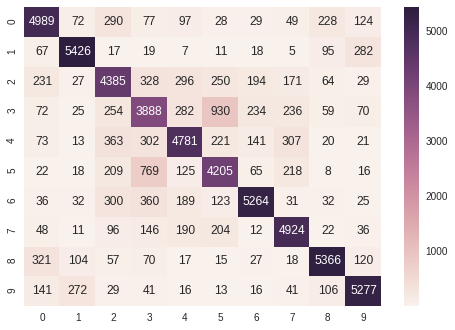

In [17]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion, range(10),range(10))
df_cm= df_cm.astype(int)
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True, fmt='d')# font size

In [18]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)

[0.96658333 0.98175    0.94658333 0.92876667 0.95533333 0.94591667
 0.96893333 0.96931667 0.97695    0.9767    ]
[0.83386261 0.9123928  0.73389121 0.64264463 0.7659404  0.74358974
 0.82352941 0.86552997 0.87751431 0.88659274]
[0.8315     0.90433333 0.73083333 0.648      0.79683333 0.70083333
 0.87733333 0.82066667 0.89433333 0.8795    ]
[0.83267963 0.90834519 0.73235908 0.6453112  0.78108152 0.72157872
 0.84958037 0.8425015  0.885844   0.88303213]
